In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
import pickle
import shap
import lime
from lime import lime_tabular



In [2]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn import metrics

# EDA

In [3]:
df = pd.read_csv("C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/raw/osteoporosis.csv")

In [3]:
import pandas as pd

# Load the CSV file
mapping_age = pd.read_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_age.csv')

# Check the first few rows of the DataFrame
print(mapping_age.head())

# Check the data types of the columns
print(mapping_age.dtypes)

# Check if '18' exists in the 'age' column
print('18' in mapping_age['age'].values)

   age  age_ordinal
0   18            0
1   19            1
2   20            2
3   21            3
4   22            4
age            int64
age_ordinal    int64
dtype: object
False


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.fillna("No")
df.head(5)

,id,age,gender,hormonal_changes,family_history,race/ethnicity,body_weight,calcium_intake,vitamin_d_intake,physical_activity,smoking,alcohol_consumption,medical_conditions,medications,prior_fractures,osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,No,No,No,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,No,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,No,Rheumatoid Arthritis,No,Yes,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1958 non-null   int64 
 1   age                  1958 non-null   int64 
 2   gender               1958 non-null   object
 3   hormonal_changes     1958 non-null   object
 4   family_history       1958 non-null   object
 5   race/ethnicity       1958 non-null   object
 6   body_weight          1958 non-null   object
 7   calcium_intake       1958 non-null   object
 8   vitamin_d_intake     1958 non-null   object
 9   physical_activity    1958 non-null   object
 10  smoking              1958 non-null   object
 11  alcohol_consumption  1958 non-null   object
 12  medical_conditions   1958 non-null   object
 13  medications          1958 non-null   object
 14  prior_fractures      1958 non-null   object
 15  osteoporosis         1958 non-null   int64 
dtypes: int

In [100]:
df.describe()

,id,age,osteoporosis
count,1.958000e+03,1958.000000,1958.000000
mean,1.549929e+06,39.101124,0.500000
std,2.614250e+05,21.355424,0.500128
min,1.100064e+06,18.000000,0.000000
25%,1.319163e+06,21.000000,0.000000
50%,1.546028e+06,32.000000,0.500000
75%,1.775870e+06,53.000000,1.000000
max,1.999676e+06,90.000000,1.000000


In [101]:
for column in df.columns:
    if column != 'id':  # Exclude the 'id' column
        print(f'Column: {column}')
        print(f'{round(df[column].value_counts(normalize=True)*100, 2)}')
        fig = px.histogram(df, x=column, title=column, width=500, height=500)
        fig.show()

Column: age
age
18    7.76
19    7.51
34    6.18
29    6.03
21    5.98
      ... 
88    0.46
60    0.41
28    0.41
58    0.36
48    0.31
Name: proportion, Length: 73, dtype: float64


Column: gender
gender
Male      50.66
Female    49.34
Name: proportion, dtype: float64


Column: hormonal_changes
hormonal_changes
Normal            50.1
Postmenopausal    49.9
Name: proportion, dtype: float64


Column: family_history
family_history
No     50.97
Yes    49.03
Name: proportion, dtype: float64


Column: race/ethnicity
race/ethnicity
African American    34.78
Caucasian           32.99
Asian               32.23
Name: proportion, dtype: float64


Column: body_weight
body_weight
Normal         52.45
Underweight    47.55
Name: proportion, dtype: float64


Column: calcium_intake
calcium_intake
Low         51.28
Adequate    48.72
Name: proportion, dtype: float64


Column: vitamin_d_intake
vitamin_d_intake
Sufficient      51.63
Insufficient    48.37
Name: proportion, dtype: float64


Column: physical_activity
physical_activity
Active       52.15
Sedentary    47.85
Name: proportion, dtype: float64


Column: smoking
smoking
Yes    50.15
No     49.85
Name: proportion, dtype: float64


Column: alcohol_consumption
alcohol_consumption
No          50.46
Moderate    49.54
Name: proportion, dtype: float64


Column: medical_conditions
medical_conditions
Hyperthyroidism         34.63
No                      33.04
Rheumatoid Arthritis    32.33
Name: proportion, dtype: float64


Column: medications
medications
No                 50.31
Corticosteroids    49.69
Name: proportion, dtype: float64


Column: prior_fractures
prior_fractures
Yes    50.2
No     49.8
Name: proportion, dtype: float64


Column: osteoporosis
osteoporosis
1    50.0
0    50.0
Name: proportion, dtype: float64


In [102]:
df.drop(['id'], axis=1, inplace=True)

In [103]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, df['osteoporosis']) 

df_cat = df.apply(cat_mut_inf) 
df_cat = df_cat.sort_values(ascending=False).to_frame(name='mutual_info_score') 
df_cat

,mutual_info_score
osteoporosis,0.693147
age,0.454868
body_weight,0.000641
medications,0.000568
physical_activity,0.000189
vitamin_d_intake,0.000151
smoking,0.000134
prior_fractures,0.000117
hormonal_changes,0.000117
medical_conditions,0.000075


In [104]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['age']])
df['age'] = enc.transform(df[['age']])

# Create df for mapping
df_mapping_age = pd.DataFrame(enc.categories_[0], columns=['age'])
df_mapping_age['age_ordinal'] = df_mapping_age.index
df_mapping_age

# Save file
df_mapping_age.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_age.csv', index=False)

In [105]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['gender']])
df['gender'] = enc.transform(df[['gender']])

# Create df for mapping
df_mapping_gender = pd.DataFrame(enc.categories_[0], columns=['gender'])
df_mapping_gender['gender_ordinal'] = df_mapping_gender.index
df_mapping_gender

# Save file
df_mapping_gender.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_gender.csv', index=False)

In [106]:
# Perform ordinal encoding
enc = OrdinalEncoder()
enc.fit(df[['hormonal_changes']])
df['hormonal_changes'] = enc.transform(df[['hormonal_changes']])

# Create df for mapping
df_mapping_hormonal_changes = pd.DataFrame(enc.categories_[0], columns=['hormonal_changes'])
df_mapping_hormonal_changes['hormonal_changes_ordinal'] = df_mapping_hormonal_changes.index
df_mapping_hormonal_changes

# Save file
df_mapping_hormonal_changes.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_hormonal_changes.csv', index=False)

In [107]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['family_history']])
df['family_history'] = enc.transform(df[['family_history']])

# Create df for mapping
df_mapping_family_history = pd.DataFrame(enc.categories_[0], columns=['family_history'])
df_mapping_family_history['family_history_ordinal'] = df_mapping_family_history.index
df_mapping_family_history

# Save file
df_mapping_family_history.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_family_history.csv', index=False)

In [108]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['race/ethnicity']])
df['race/ethnicity'] = enc.transform(df[['race/ethnicity']])

# Create df for mapping
df_mapping_race_ethnicity = pd.DataFrame(enc.categories_[0], columns=['race_ethnicity'])
df_mapping_race_ethnicity['race_ethnicity_ordinal'] = df_mapping_race_ethnicity.index
df_mapping_race_ethnicity

# Save file
df_mapping_race_ethnicity.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_race_ethnicity.csv', index=False)

In [109]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['body_weight']])
df['body_weight'] = enc.transform(df[['body_weight']])

# Create df for mapping
df_mapping_body_weight = pd.DataFrame(enc.categories_[0], columns=['body_weight'])
df_mapping_body_weight['body_weight_ordinal'] = df_mapping_body_weight.index
df_mapping_body_weight

# Save file
df_mapping_body_weight.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_body_weight.csv', index=False)

In [110]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['calcium_intake']])
df['calcium_intake'] = enc.transform(df[['calcium_intake']])

# Create df for mapping
df_mapping_calcium_intake = pd.DataFrame(enc.categories_[0], columns=['calcium_intake'])
df_mapping_calcium_intake['calcium_intake_ordinal'] = df_mapping_calcium_intake.index
df_mapping_calcium_intake

# Save file
df_mapping_calcium_intake.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_calcium_intake.csv', index=False)

In [111]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['vitamin_d_intake']])
df['vitamin_d_intake'] = enc.transform(df[['vitamin_d_intake']])

# Create df for mapping
df_mapping_vitamin_d_intake = pd.DataFrame(enc.categories_[0], columns=['vitamin_d_intake'])
df_mapping_vitamin_d_intake['vitamin_d_intake_ordinal'] = df_mapping_vitamin_d_intake.index
df_mapping_vitamin_d_intake

# Save file
df_mapping_vitamin_d_intake.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_vitamin_d_intake.csv', index=False)

In [112]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['physical_activity']])
df['physical_activity'] = enc.transform(df[['physical_activity']])

# Create df for mapping
df_mapping_physical_activity = pd.DataFrame(enc.categories_[0], columns=['physical_activity'])
df_mapping_physical_activity['physical_activity_ordinal'] = df_mapping_physical_activity.index
df_mapping_physical_activity

# Save file
df_mapping_physical_activity.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_physical_activity.csv', index=False)

In [113]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['smoking']])
df['smoking'] = enc.transform(df[['smoking']])

# Create df for mapping
df_mapping_smoking = pd.DataFrame(enc.categories_[0], columns=['smoking'])
df_mapping_smoking['smoking_ordinal'] = df_mapping_smoking.index
df_mapping_smoking

# Save file
df_mapping_smoking.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_smoking.csv', index=False)

In [114]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['alcohol_consumption']])
df['alcohol_consumption'] = enc.transform(df[['alcohol_consumption']])

# Create df for mapping
df_mapping_alcohol_consumption = pd.DataFrame(enc.categories_[0], columns=['alcohol_consumption'])
df_mapping_alcohol_consumption['alcohol_consumption_ordinal'] = df_mapping_alcohol_consumption.index
df_mapping_alcohol_consumption

# Save file
df_mapping_alcohol_consumption.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_alcohol_consumption.csv', index=False)

In [115]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['medical_conditions']])
df['medical_conditions'] = enc.transform(df[['medical_conditions']])

# Create df for mapping
df_mapping_medical_conditions = pd.DataFrame(enc.categories_[0], columns=['medical_conditions'])
df_mapping_medical_conditions['medical_conditions_ordinal'] = df_mapping_medical_conditions.index
df_mapping_medical_conditions

# Save file
df_mapping_medical_conditions.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_medical_conditions.csv', index=False)

In [116]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['medications']])
df['medications'] = enc.transform(df[['medications']])

# Create df for mapping
df_mapping_medications = pd.DataFrame(enc.categories_[0], columns=['medications'])
df_mapping_medications['medications_ordinal'] = df_mapping_medications.index
df_mapping_medications

# Save file
df_mapping_medications.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_medications.csv', index=False)

In [117]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['prior_fractures']])
df['prior_fractures'] = enc.transform(df[['prior_fractures']])

# Create df for mapping
df_mapping_prior_fractures = pd.DataFrame(enc.categories_[0], columns=['prior_fractures'])
df_mapping_prior_fractures['prior_fractures_ordinal'] = df_mapping_prior_fractures.index
df_mapping_prior_fractures

# Save file
df_mapping_prior_fractures.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_prior_fractures.csv', index=False)

In [118]:
# Perform ordinal encoding 
enc = OrdinalEncoder()
enc.fit(df[['osteoporosis']])
df['osteoporosis'] = enc.transform(df[['osteoporosis']])

# Create df for mapping
df_mapping_osteoporosis = pd.DataFrame(enc.categories_[0], columns=['osteoporosis'])
df_mapping_osteoporosis['osteoporosis_ordinal'] = df_mapping_osteoporosis.index
df_mapping_osteoporosis

# Save file
df_mapping_osteoporosis.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/mapping_osteoporosis.csv', index=False)

In [119]:
df.to_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/osteoporosis_data_cleaned.csv', index=False)


In [120]:
df_clean = pd.read_csv('C:/Users/16462/python-projects/osteoporosis/model_dev/dataset/processed/osteoporosis_data_cleaned.csv')

# Break up and train data

In [121]:
train_df_clean, valid_df_clean, test_df_clean = np.split(df_clean.sample(frac=1, random_state=42), 
                                       [int(.7*len(df_clean)), int(0.85*len(df_clean))])
train_df_clean = train_df_clean.reset_index(drop = True)
valid_df_clean = valid_df_clean.reset_index(drop = True)
test_df_clean = test_df_clean.reset_index(drop = True)

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.


In [122]:
df_clean.osteoporosis.value_counts()

osteoporosis
1.0    979
0.0    979
Name: count, dtype: int64

In [123]:
train_df_clean.osteoporosis.value_counts()

osteoporosis
1.0    702
0.0    668
Name: count, dtype: int64

In [124]:
valid_df_clean.osteoporosis.value_counts()

osteoporosis
0.0    153
1.0    141
Name: count, dtype: int64

In [125]:
test_df_clean.osteoporosis.value_counts()

osteoporosis
0.0    158
1.0    136
Name: count, dtype: int64

In [126]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual)) # The ratio of the positive class in the complete data

In [127]:

X_train = df_clean.drop(['osteoporosis'], axis=1)
y_train = df_clean['osteoporosis']


X_valid = valid_df_clean.drop(['osteoporosis'], axis=1)
y_valid = valid_df_clean['osteoporosis']

X_test = test_df_clean.drop(['osteoporosis'], axis=1)
y_test = test_df_clean['osteoporosis']

In [128]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()
X_test_scaled = X_test.copy()

columns_to_scale = ['age', 'gender', 'hormonal_changes', 'family_history', 'race/ethnicity', 'body_weight', 'calcium_intake', 'vitamin_d_intake', 'physical_activity', 'smoking', 'alcohol_consumption', 'medical_conditions', 'medications', 'prior_fractures']

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_scaled[columns_to_scale])
X_valid_scaled[columns_to_scale] = scaler.transform(X_valid_scaled[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test_scaled[columns_to_scale])

# Save the scaler for later use
pickle.dump(scaler, open('C:/Users/16462/python-projects/osteoporosis/model_dev/models/osteoporosis_scalar.sav', 'wb'))

In [129]:
# Split the training data into positive and negative
rows_pos = train_df_clean.osteoporosis == 1
df_clean_train_pos = train_df_clean.loc[rows_pos]
df_clean_train_neg = train_df_clean.loc[~rows_pos]

# Merge the balanced data
df_clean_balanced = pd.concat([df_clean_train_pos, df_clean_train_neg.sample(n = len(df_clean_train_pos), random_state = 111, replace=True)],axis = 0)

# Shuffle the order of training samples 
df_clean_balanced = df_clean_balanced.sample(n = len(df_clean_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_clean_balanced), \
                                                calc_prevalence(df_clean_balanced.osteoporosis.values)))

Train balanced prevalence(n = 1404):0.500


In [130]:
# Pkle the X_train for later use in explanation
pickle.dump(X_train, open('C:/Users/16462/python-projects/osteoporosis/model_dev/models/X_train.sav', 'wb'))
# Pkle X.columns for later use in explanation
X = df_clean.drop(['osteoporosis'], axis=1)
pickle.dump(X.columns, open('C:/Users/16462/python-projects/osteoporosis/model_dev/models/X_columns.sav', 'wb'))

# Creating models

In [131]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    
    '''
    This function calculates all the metrics to assest the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity


## Baseline Model

In [132]:
##### Create a baseline model using DummyClassifier
# Initialize the DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
# Train the model on the training set
dummy.fit(X_train, y_train)
dummy_acc = dummy.score(X_valid, y_valid)
# Print the results
print('Accuracy:', dummy_acc)


Accuracy: 0.5204081632653061


## Linear Regression Model

In [133]:
# Create a linear regression model
# Define the features and the target variable
X = df_clean.drop('osteoporosis', axis=1)  # Features (all columns except 'osteoporosis')
y = df['osteoporosis']               # Target variable (osteoporosis)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.13424451017878888
R^2 Score: 0.4628961279945476


## Logistic Regression Model

In [134]:
# Create a logistic regression model
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.897
accuracy:0.827
recall:0.780
precision:0.846
specificity:0.869
prevalence:0.480
 


In [135]:
prevalence = calc_prevalence(y_valid)
mod1 = {'Model name': 'Logistic Regression', 'AUC': lr_valid_auc, 'Accuracy': lr_valid_accuracy, 'Recall': lr_valid_recall,
        'Precision': lr_valid_precision, 'Specificity': lr_valid_specificity, 'Prevalence': prevalence}
col = ['Model name', 'AUC', 'Accuracy', 'Recall', 'Precision', 'Specificity', 'Prevalence']
results_test = pd.DataFrame(mod1, columns=col, index=[0])
results_test

,Model name,AUC,Accuracy,Recall,Precision,Specificity,Prevalence
0,Logistic Regression,0.896908,0.826531,0.780142,0.846154,0.869281,0.479592


## KNN Model

In [136]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

knn_preds = knn.predict_proba(X_valid)[:,1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,knn_preds, 0.5)

AUC:0.910
accuracy:0.847
recall:0.730
precision:0.936
specificity:0.954
prevalence:0.480
 


In [137]:
mod2 = {'Model name': 'KNN', 'AUC': lr_valid_auc, 'Accuracy': lr_valid_accuracy, 'Recall': lr_valid_recall,
        'Precision': lr_valid_precision, 'Specificity': lr_valid_specificity, 'Prevalence': prevalence}
col = ['Model name', 'AUC', 'Accuracy', 'Recall', 'Precision', 'Specificity', 'Prevalence']
results2 = pd.DataFrame(mod2, columns=col, index=[0])
results_test = pd.concat([results_test, results2], ignore_index=True)
results_test

,Model name,AUC,Accuracy,Recall,Precision,Specificity,Prevalence
0,Logistic Regression,0.896908,0.826531,0.780142,0.846154,0.869281,0.479592
1,KNN,0.910142,0.846939,0.730496,0.936364,0.954248,0.479592


## Decision Tree Model

In [138]:
dc_clf = DecisionTreeClassifier(random_state=42, max_depth = 10)
dc_clf.fit(X_train, y_train)

dc_preds_proba = dc_clf.predict_proba(X_valid)[:,1]
dc_preds = dc_clf.predict(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,dc_preds_proba, 0.5)

AUC:0.993
accuracy:0.942
recall:0.894
precision:0.984
specificity:0.987
prevalence:0.480
 


In [139]:
mod3 = {'Model name': 'Decision Tree', 'AUC': lr_valid_auc, 'Accuracy': lr_valid_accuracy, 'Recall': lr_valid_recall,
        'Precision': lr_valid_precision, 'Specificity': lr_valid_specificity, 'Prevalence': prevalence}
col = ['Model name', 'AUC', 'Accuracy', 'Recall', 'Precision', 'Specificity', 'Prevalence']
results3 = pd.DataFrame(mod3, columns=col, index=[0])
results_test = pd.concat([results_test, results3], ignore_index=True)
results_test

,Model name,AUC,Accuracy,Recall,Precision,Specificity,Prevalence
0,Logistic Regression,0.896908,0.826531,0.780142,0.846154,0.869281,0.479592
1,KNN,0.910142,0.846939,0.730496,0.936364,0.954248,0.479592
2,Decision Tree,0.993186,0.942177,0.893617,0.984375,0.986928,0.479592


## Random Forest Model

In [140]:
rf_clf = RandomForestClassifier(random_state=111, max_depth = 6)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_valid)
rf_preds_proba = rf_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,rf_preds_proba, 0.5)

AUC:0.956
accuracy:0.871
recall:0.738
precision:0.990
specificity:0.993
prevalence:0.480
 


In [141]:
mod4 = {'Model name': 'Random Forest', 'AUC': lr_valid_auc, 'Accuracy': lr_valid_accuracy, 'Recall': lr_valid_recall,
        'Precision': lr_valid_precision, 'Specificity': lr_valid_specificity, 'Prevalence': prevalence}
col = ['Model name', 'AUC', 'Accuracy', 'Recall', 'Precision', 'Specificity', 'Prevalence']
results4 = pd.DataFrame(mod4, columns=col, index=[0])
results_test = pd.concat([results_test, results4], ignore_index=True)
results_test

,Model name,AUC,Accuracy,Recall,Precision,Specificity,Prevalence
0,Logistic Regression,0.896908,0.826531,0.780142,0.846154,0.869281,0.479592
1,KNN,0.910142,0.846939,0.730496,0.936364,0.954248,0.479592
2,Decision Tree,0.993186,0.942177,0.893617,0.984375,0.986928,0.479592
3,Random Forest,0.955593,0.870748,0.737589,0.990476,0.993464,0.479592


## XGB Model

In [142]:

xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate = 1.0, use_label_encoder = False,\
                            eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_valid)
xgb_preds_proba = xgb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,xgb_preds_proba, 0.5)

AUC:0.998
accuracy:0.969
recall:0.950
precision:0.985
specificity:0.987
prevalence:0.480
 


In [143]:
mod5 = {'Model name': 'XGB', 'AUC': lr_valid_auc, 'Accuracy': lr_valid_accuracy, 'Recall': lr_valid_recall,
        'Precision': lr_valid_precision, 'Specificity': lr_valid_specificity, 'Prevalence': prevalence}
col = ['Model name', 'AUC', 'Accuracy', 'Recall', 'Precision', 'Specificity', 'Prevalence']
results5 = pd.DataFrame(mod5, columns=col, index=[0])
results_test = pd.concat([results_test, results5], ignore_index=True)


In [144]:
results_test

,Model name,AUC,Accuracy,Recall,Precision,Specificity,Prevalence
0,Logistic Regression,0.896908,0.826531,0.780142,0.846154,0.869281,0.479592
1,KNN,0.910142,0.846939,0.730496,0.936364,0.954248,0.479592
2,Decision Tree,0.993186,0.942177,0.893617,0.984375,0.986928,0.479592
3,Random Forest,0.955593,0.870748,0.737589,0.990476,0.993464,0.479592
4,XGB,0.997775,0.969388,0.950355,0.985294,0.986928,0.479592


[22:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


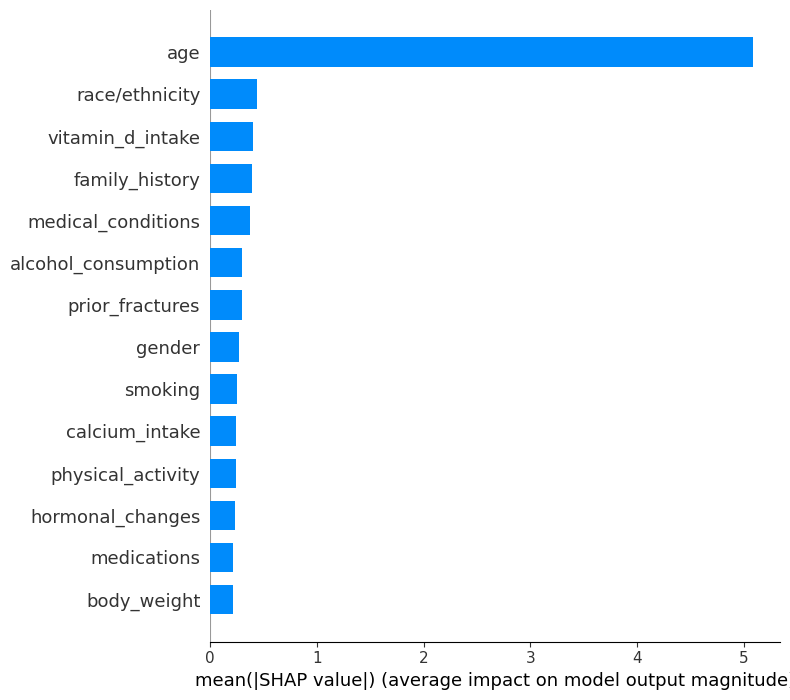

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

In [145]:

# EXPLORATION 
# feature importance with SHAP
explainer = shap.TreeExplainer(xgb_clf)
explanation = explainer(X_test)
shape_vlaues = explanation.values
shap.summary_plot(explanation, X_test, plot_type="bar")

# feature importance with LIME
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.to_numpy(),  # Convert DataFrame to numpy array
    feature_names=X.columns,
    class_names=['female', 'male'],
    mode='classification',
)

# Pick the observation in the validation set for which explanation is required
observation_1 = 20
# Get the explanation for Logistic Regression and show the prediction
# exp = explainer.explain_instance(X_valid[observation_1], xgb_preds_proba, num_features=15)
exp = explainer.explain_instance(X_valid.iloc[observation_1], xgb_clf.predict_proba, num_features=15)
# exp.save_to_file('C:/Users/16462/python-projects/osteoporosis/model_dev/models/observation_1.html')
exp.save_to_file('C:/Users/16462/python-projects/osteoporosis/model_dev/models/observation_1.html')


In [146]:
## save the model
pickle.dump(xgb_clf, open('C:/Users/16462/python-projects/osteoporosis/model_dev/models/xgboost_model.sav', 'wb'))